In [1]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

In [2]:
infile = 'LS_5789_Veg_Frac_1984_2023_missing_2012_39lyr_stck_041524_Delta.tif'
r1 = rioxarray.open_rasterio(
    infile )
r1

<xarray.DataArray (band: 39, y: 696, x: 701)> Size: 152MB
[19027944 values with dtype=float64]
Coordinates:
  * band         (band) int64 312B 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39
  * x            (x) float64 6kB -89.3 -89.3 -89.3 ... -89.12 -89.12 -89.12
  * y            (y) float64 6kB 29.33 29.33 29.33 29.33 ... 29.15 29.15 29.15
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0.09312218985086616
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         0.17753535996879
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.30515928603086
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               ('b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8',...

In [3]:
# skeptical that the lat/lon grid is really correct and that this transformation is the right thing to do
lon, lat = np.meshgrid(r1.y.values, r1.x.values, indexing='ij' )
transformer = Transformer.from_crs( 'epsg:4326', 'epsg:26916',  ) # WGS84 to UTM18
x, y = transformer.transform( lon, lat  )
print(np.shape(lon))
# don't really need to read this in
band = r1.band.values-1 # minus one to use as index
# here is the data
a = r1[:,:,:].values
print(np.shape(a))

(696, 701)
(39, 696, 701)


In [4]:
# Based on the filename, make a list of years that correspond to the bands
yr = np.arange(1984,2024).tolist()
yr.remove(2012)
print(yr)
print(len(yr))

[1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
39


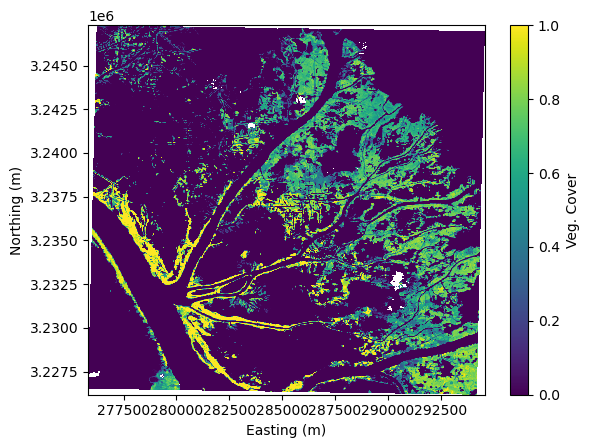

In [5]:
# map the first band (1984)
plt.pcolormesh(x, y, a[0,:,:])
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)' )
plt.colorbar( label='Veg. Cover')

Text(0, 0.5, 'Mean Veg. Cover')

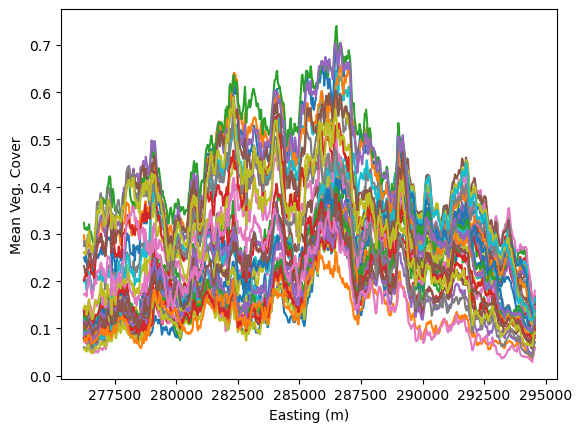

In [7]:
# east-west profiles made by averaging along y-axis
# plot all of the profiles
profiles = np.zeros((39,len(x[0,:])))
tot_area = np.zeros((39))
for i, b in enumerate( band ):
    tot_area[i] = np.nanmean(a[i,:,:], axis=(0,1) )
    profiles[i,:] = np.nanmean(a[i,:,:], axis=0)
    plt.plot( x[0,:], profiles[i,:] )

plt.xlabel('Easting (m)')
plt.ylabel('Mean Veg. Cover')

Text(0, 0.5, 'Mean Veg. Cover')

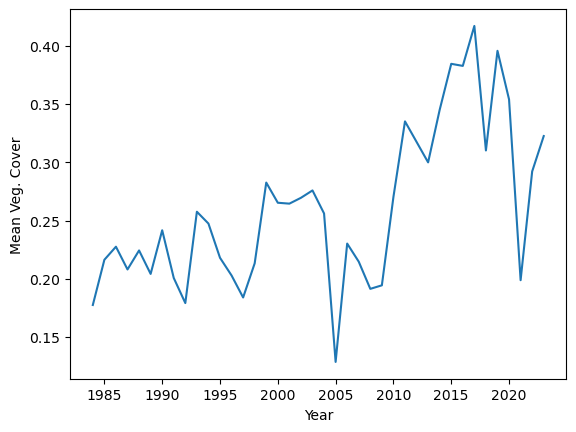

In [8]:
# this plot should be changed to include NaN for 2012
plt.plot(yr, tot_area)
plt.xlabel('Year')
plt.ylabel('Mean Veg. Cover')